# Analysis

In [1]:
import sys
sys.path.append('D:/source/repos')
from utilities.std_imports import *

import scipy as sc
import time
import splines as sp
#import integrals as it
import methods as mt
#import TSAnalysis.Splines as ts
#import TSAnalysis.TsIntegrals as ti
#import Helpers.TSMethods as ht
#import Plotting.TsPlots as pp
#import Parallelization.MThreadingWorkers as mw

### Load data

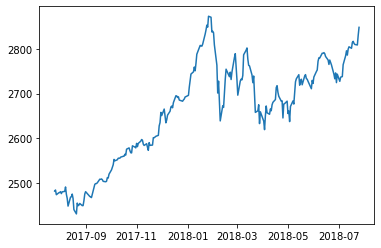

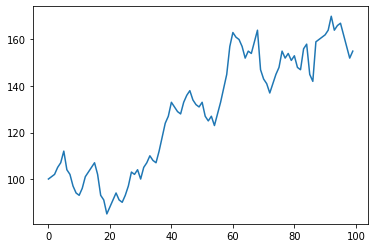

In [2]:
df = pd.read_csv(csv_path + 'sp500.csv')
date = pd.to_datetime(df.iloc[:,0].values, dayfirst=True)
price = df.iloc[:,2].values

dfToy = pd.read_csv(csv_path + 'toy/toy.csv')
ts1 = dfToy.iloc[:,1].values

plt.plot(date, price)
plt.show()
plt.plot(ts1);

### Methods

Get Inflection Points

In [17]:
points = sp.GetInflectionPointIdxs(ts1)
print(ts1)
print(points)
values = ts1
vp.PlotTsPoints2(values, points)

[100 101 102 105 107 112 104 102  97  94  93  96 101 103 105 107 102  93
  91  85  88  91  94  91  90  93  97 103 102 104 100 105 107 110 108 107
 112 118 124 127 133 131 129 128 133 136 138 134 132 131 133 127 125 127
 123 128 133 139 145 157 163 161 160 157 152 155 154 159 164 147 143 141
 137 141 145 148 155 152 154 151 153 148 147 156 158 145 142 159 160 161
 162 164 170 164 166 167 162 157 152 155]
[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.
  0. -1.  0.  0.  1.  0. -1.  0.  0.  1. -1.  1. -1.  0.  0.  1.  0. -1.
  0.  0.  0.  0.  1.  0.  0. -1.  0.  0.  1.  0.  0. -1.  1.  0. -1.  1.
 -1.  0.  0.  0.  0.  0.  1.  0.  0.  0. -1.  1. -1.  0.  1.  0.  0.  0.
 -1.  0.  0.  0.  1. -1.  1. -1.  1.  0. -1.  0.  1.  0. -1.  0.  0.  0.
  0.  0.  1. -1.  0.  1.  0.  0. -1.  0.]


NameError: name 'vp' is not defined

Get Inflection Points Series

In [ ]:
points = ts.GetInflectionPointIdxs(self.ts1)
ips, nPs = ts.GetIPSeries(self.ts1, points)
df = pd.DataFrame({'col1':self.ts1, 'col2':ips})
print(df)
print(ips)
plt.plot(self.ts1)
plt.plot(ips)
plt.show()

integTs, integErr, relErr = ti.TsIntegError(self.ts1, ips)
print('Ts origin = ','{0:.2f}'.format(integTs))
print('Ts interp = ','{0:.2f}'.format(integErr))
print('Rel Err = ','{0:.2f}'.format(relErr))

Integrals Difference

In [ ]:
points = ts.GetInflectionPointIdxs(self.ts1)
irpe1, irpe2 = ti.TsIntegRelPointError(self.ts1, points)
print('irpe1 = ', '{0:.2f}'.format(irpe1))
print('irpe2 = ', '{0:.2f}'.format(irpe2))

Integrals Difference Optimization

In [ ]:
points = ti.OptimIrpe(ts=self.ts1, decRate=0.999, trace=True)
vp.PlotTsPoints2(self.ts1, points)
vp.PlotTsPoints2Interp(self.ts1, points)

idx = np.array(np.where(points != 0)).flatten()
val = np.array(self.ts1[np.where(points != 0)])
df = pd.DataFrame({'col1':idx, 'col2':val})
print(df)

Integrals Difference Optimization 2

In [ ]:
points = ti.OptimIrpe(ts=self.ts1, decRate=0.999, trace=True)
pp.PlotTsPoints2(self.ts1, points)
pp.PlotTsPoints2Interp(self.ts1, points)

Integrals Difference MultiThreading

In [ ]:
TimesSeq = []
TimesMTh = []
t1=time.time()
for n in range(20):
    for t in range(n):
        points1 = ti.OptimIrpe(ts=self.ts1, decRate=0.999, trace=False)
        #points2 = ti.OptimIrpe(ts=self.price, decRate=0.999, trace=False)
    t2=time.time()
    delta = t2-t1
    print("Sequential : ", '{0:.2f}'.format(delta))
    TimesSeq.append(delta)

#pp.PlotTsPoints2Interp(self.ts1, points1)
    #pp.PlotTsPoints2Interp(self.price, points2)

    t1=time.time()
    Jobs = []
    for t in range(n):
        Jobs.append(mw.MThOptimIrpe(ts=self.ts1, decRate=0.999, trace=False))
        #Jobs.append(mw.MThOptimIrpe(ts=self.price, decRate=0.999, trace=False))
    for i in range(len(Jobs)-1): Jobs[i].start()
    for i in range(len(Jobs)-1): Jobs[i].join()
    t2=time.time()
    delta = t2-t1
    print("Multithreading : ", '{0:.2f}'.format(delta))
    TimesMTh.append(delta)

#pp.PlotTsPoints2Interp(self.ts1, Jobs[0].output)
#pp.PlotTsPoints2Interp(self.price, Jobs[1].output)

plt.plot(TimesSeq)
plt.plot(TimesMTh)
plt.show()

Idx2BinArray

In [ ]:
idxs = [0, 1, 3, 6]
binArr1 = ht.Idx2BinArray(idxs)
print(binArr1)
binArr2 = ht.Idx2BinArray(idxs,9)
print(binArr2)